In [78]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn 
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score

In [79]:
#importing the data
df = pd.read_csv('Mall_customers.csv')

In [80]:
#get rid of the null values
df.dropna(inplace=True)
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [81]:
#using sklearn's label encoder for the stringvalues
le = LabelEncoder()

# Fit and transform the categorical column into numerical values
df['Gender'] = le.fit_transform(df['Gender'])
df 

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


C:\Users\Varun\AppData\Local\Temp\ipykernel_25876\1305112197.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(df_pca[:, 0], df_pca[:, 1], cmap='viridis', marker='o')


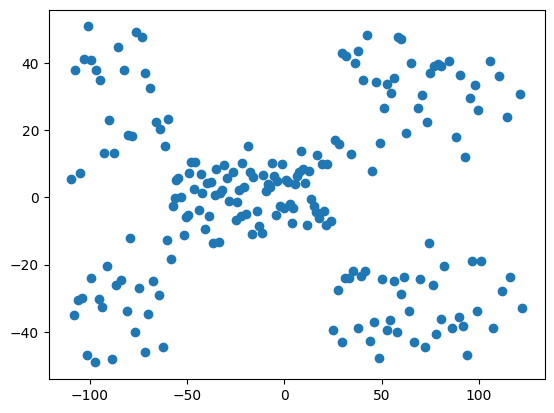

In [82]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df)
plt.scatter(df_pca[:, 0], df_pca[:, 1], cmap='viridis', marker='o')
plt.show()

In [83]:
x_train ,x_test = train_test_split(df, test_size=.3, random_state=42)
x_test

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
95,96,1,24,60,52
15,16,1,22,20,79
30,31,1,60,30,4
158,159,1,34,78,1
128,129,1,59,71,11
115,116,0,19,65,50
69,70,0,32,48,47
170,171,1,40,87,13
174,175,0,52,88,13
45,46,0,24,39,65


In [84]:
#Normalizing the data with the standard scaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(x_train)

In [85]:
data_scaled

array([[ 1.18403566,  1.08972474, -0.47625237,  0.98322099,  0.4438231 ],
       [-0.02715568, -0.91766294, -0.83128609, -0.01051573, -0.05203819],
       [-1.1374144 , -0.91766294, -1.25732655, -1.11466765,  0.82525485],
       [-1.45703434, -0.91766294,  1.36992295, -1.48271829, -1.38704935],
       [-1.07012599, -0.91766294, -1.25732655, -1.00425246,  1.13040026],
       [ 0.34293056, -0.91766294,  0.80186901,  0.24711972,  0.21496404],
       [-0.95237128,  1.08972474,  0.65985552, -0.78342208, -0.58604265],
       [ 1.52047769, -0.91766294, -0.1922254 ,  1.57210202,  1.28297297],
       [-0.14491039, -0.91766294,  2.07999038, -0.0473208 ,  0.13867769],
       [ 0.62890629, -0.91766294,  0.37582855,  0.4679501 , -1.69219475],
       [-0.80097236,  1.08972474, -0.40524563, -0.67300688,  0.32939357],
       [ 0.47750738,  1.08972474,  0.09180158,  0.39433997,  1.66440472],
       [ 1.06628094,  1.08972474, -1.39934003,  0.76239061, -1.7684811 ],
       [-0.96919338,  1.08972474, -1.0

In [137]:
#initializing cluster centroids respective to the dataset
np.random.seed(42)
initial_centroids = data_scaled[np.random.choice(data_scaled.shape[0], size=4, replace=False)]

In [140]:
kmeans = KMeans(n_clusters=4, init=initial_centroids, n_init=1)

kmeans.fit(data_scaled)

KMeans(init=array([[ 1.63823241, -0.91766294,  0.44683529,  2.41861849, -0.89118806],
       [ 0.81394941, -0.91766294, -0.47625237,  0.61517035,  0.86339803],
       [ 0.7130168 ,  1.08972474, -0.47625237,  0.54156023,  1.58811837],
       [ 1.5877661 , -0.91766294, -0.05021191,  1.94015266,  1.51183202]]),
       n_clusters=4, n_init=1)

In [141]:
#using principle componenet analysis for dimentionality reduction to plot in 2d
data_pca = pca.fit_transform(data_scaled)

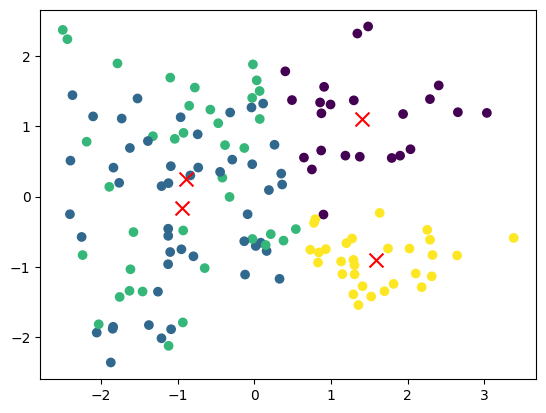

In [142]:
#plotting the data and the cluster centroids
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=kmeans.labels_, cmap='viridis', marker='o')
plt.scatter(pca.transform(kmeans.cluster_centers_)[:, 0], pca.transform(kmeans.cluster_centers_)[:, 1], 
            c='red', marker='x', s=100, label='Centroids')
plt.show()

In [143]:
norm = scaler.fit_transform(x_test)

In [144]:
labels = kmeans.labels_
silhouette_avg = silhouette_score(x_test,labels_)
silhouette_avg

0.4636994910084053